# Kaggle ML and Data Science Survey

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importing all available data to pandas dataframe

In [3]:
mcq_data = pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)
conv_rates_data = pd.read_csv('conversionRates.csv',encoding='ISO-8859-1')
freeform_data = pd.read_csv('freeformResponses.csv',encoding='ISO-8859-1',low_memory=False)

In [4]:
mcq_data.head()
# conv_rates_data.head()
# freeform_data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mcq_data.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
# Basic Analysis and Data cleaning 

total_responses = mcq_data.shape[0]
print("Total number of survey responses : ", total_responses)

total_country = mcq_data['Country'].nunique()
print("Total number of countries participated : ", total_country)

Total number of survey responses :  16716
Total number of countries participated :  52


## Most enthusiast data scientists Home Country

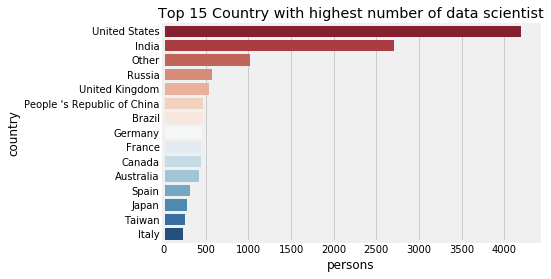

In [177]:
# Top 15 country with highest number of data scientist.
data = mcq_data['Country'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.Country, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("country")
plt.figure(figsize=(15,15))
plt.show()

## Profession of most of the data scientist

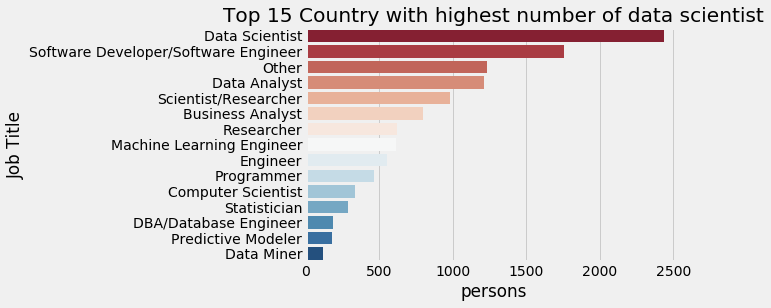

In [173]:
data = mcq_data['CurrentJobTitleSelect'].value_counts()[:15].to_frame()
plt.title("Top 15 Country with highest number of data scientist")
sns.barplot(y=data.index, x=data.CurrentJobTitleSelect, palette="RdBu")
plt.xlabel("persons")
plt.ylabel("Job Title")
plt.figure(figsize=(15,8))
plt.show()

# # Compensation of data scientist 

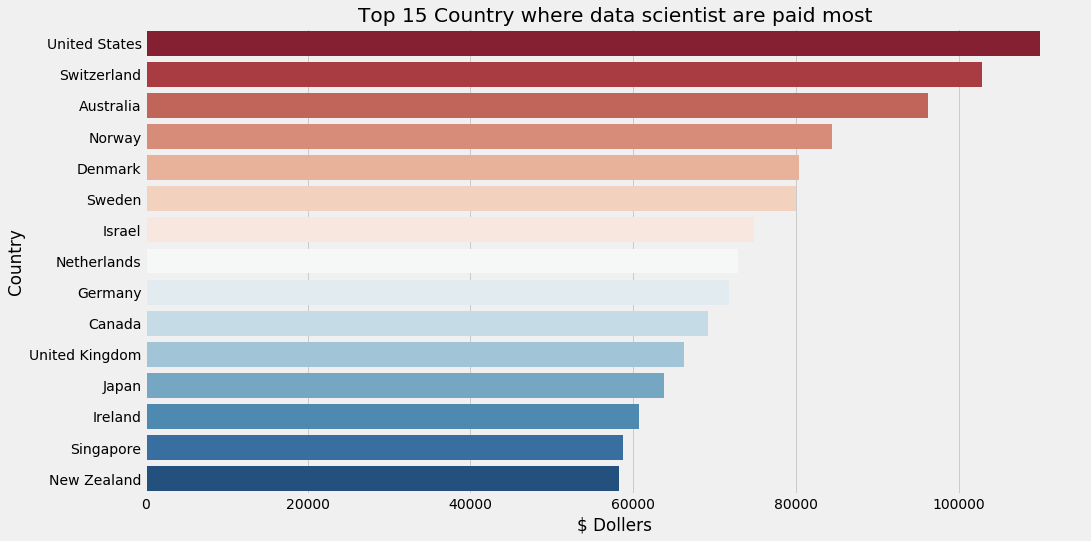

In [172]:
# Country wise compensation
salary = mcq_data[['Country','CompensationAmount','CompensationCurrency','EmploymentStatus','MajorSelect']].dropna()
# sal_countrywise = 
salary = salary[salary['CompensationAmount'] != '-']
salary = salary[salary['CompensationAmount'] != '-99']
CompensationAmount = salary['CompensationAmount'].str.replace(',','').apply(pd.to_numeric)
salary.drop('CompensationAmount', axis=1)
salary['CompensationAmount'] = CompensationAmount

salary = salary.merge(conv_rates_data, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']

top15_country = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()

plt.figure(figsize=(15,8))
plt.title("Top 15 Country where data scientist are paid most")
sns.barplot(y=top15_country.index, x=top15_country.Salary, palette="RdBu")
plt.xlabel("$ Dollers")
plt.ylabel("Country")
plt.figure(figsize=(15,8))
plt.show()

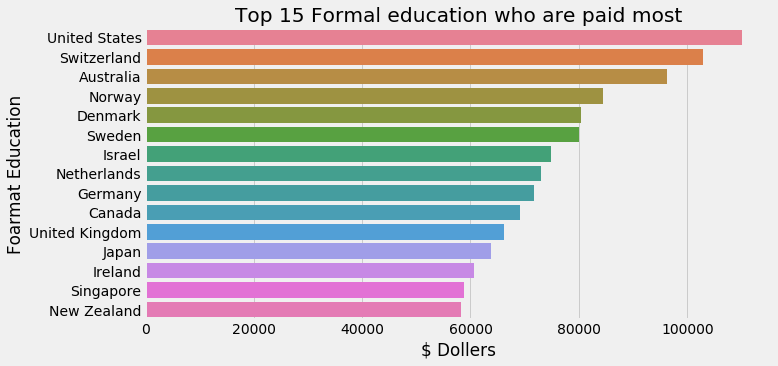

In [171]:
top15_Major = salary.groupby('MajorSelect')['Salary'].median().sort_values(ascending=False)[:15].to_frame()

plt.subplots(figsize=(10,5))
plt.title("Top 15 Formal education who are paid most")
sns.barplot(y=top15_country.index, x=top15_country.Salary, palette="husl")
plt.xlabel("$ Dollers")
plt.ylabel("Foarmat Education")
plt.figure(figsize=(15,8))
plt.show()

## Employment status

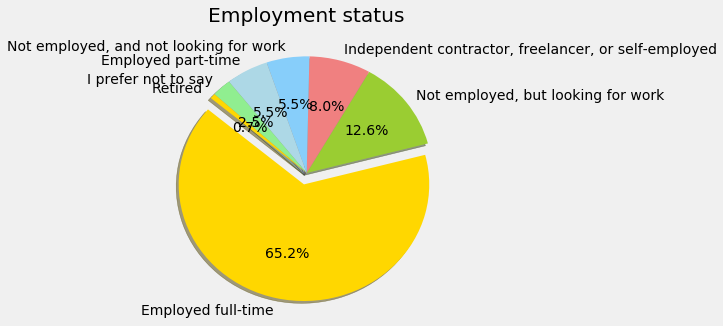

In [167]:
plt.subplots(figsize=(5,5))
emp_status = mcq_data['EmploymentStatus'].value_counts().to_frame()
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightblue', 'lightgreen']
explode = (0.1, 0, 0, 0, 0, 0 ,0)
plt.title("Employment status")
plt.pie(emp_status['EmploymentStatus'], labels=emp_status.index, colors=color,shadow=True, startangle=140, explode=explode, autopct='%1.1f%%',)
plt.show()

## Age range in which most data scientist fall into:

In [42]:
mcq_data['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

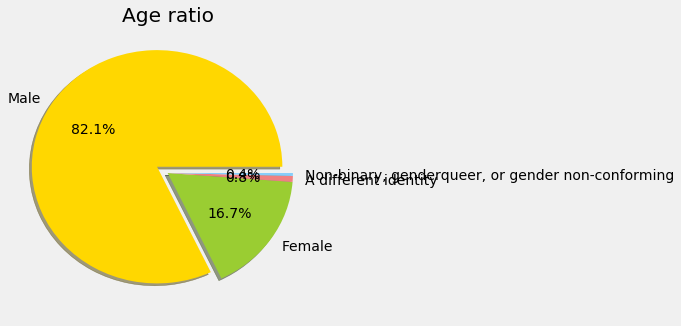

In [166]:
# Above we can see that the minimum age of a datascientist is 0 yrs and highest age is 100 yrs. These both can
# not be possible, so we will remove these false values first then will continue :

# age_data['GenderSelect'].value_counts()
age_data = mcq_data[mcq_data['Age'] >=10]
age_data = age_data[age_data['Age'] <= 65]
age_data['GenderSelect'].value_counts()

age = age_data['GenderSelect'].value_counts().to_frame()
color = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
plt.subplots(figsize=(5,5))
plt.title("Age ratio")
plt.pie(age['GenderSelect'], labels=age.index, colors=color,shadow=True, explode=explode, autopct='%1.1f%%')
plt.show()

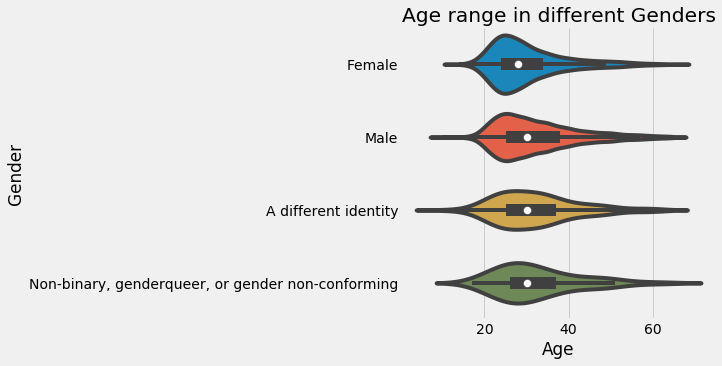

In [165]:
plt.subplots(figsize=(5,5))
plt.title("Age range in different Genders")
sns.violinplot(age_data['Age'], age_data['GenderSelect']) #Variable Plot
sns.despine()
plt.ylabel("Gender")
plt.show()

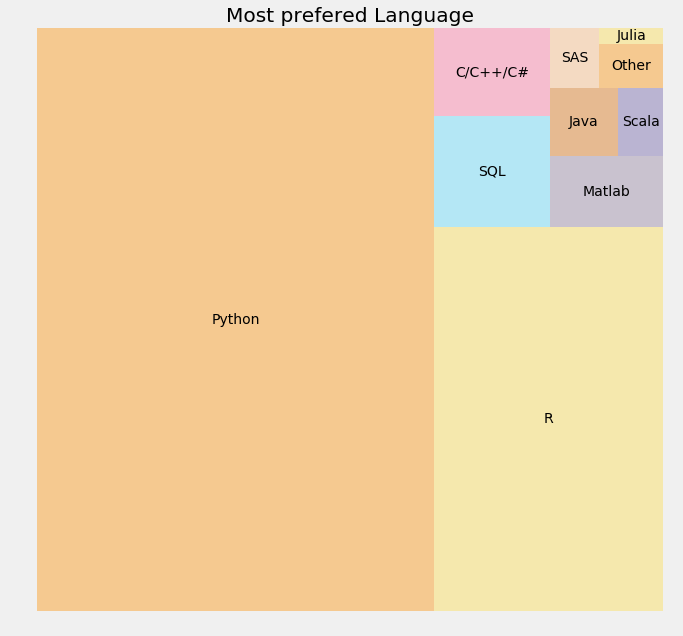

In [162]:
plt.subplots(figsize=(10,10))
prefer_lang = mcq_data['LanguageRecommendationSelect'].value_counts()[:10].to_frame()
import squarify
color = ['#FE9000', '#FFDD4A', '#5ADBFF', '#FF729F', '#907F9F', '#D76A03','#6B5CA5' , '#FCB97D']
squarify.plot(sizes = prefer_lang.LanguageRecommendationSelect, label = prefer_lang.index,color=color, alpha=.4 )
plt.axis('off')
plt.title("Most prefered Language")
plt.show()


In [140]:
mcq_data['LearningPlatformSelect'].value_counts()[:10]

Kaggle                           210
Online courses                   209
Personal Projects                155
YouTube Videos                   127
College/University               127
Stack Overflow Q&A               106
Kaggle,Online courses             97
Blogs                             81
Textbook                          67
Online courses,YouTube Videos     65
Name: LearningPlatformSelect, dtype: int64

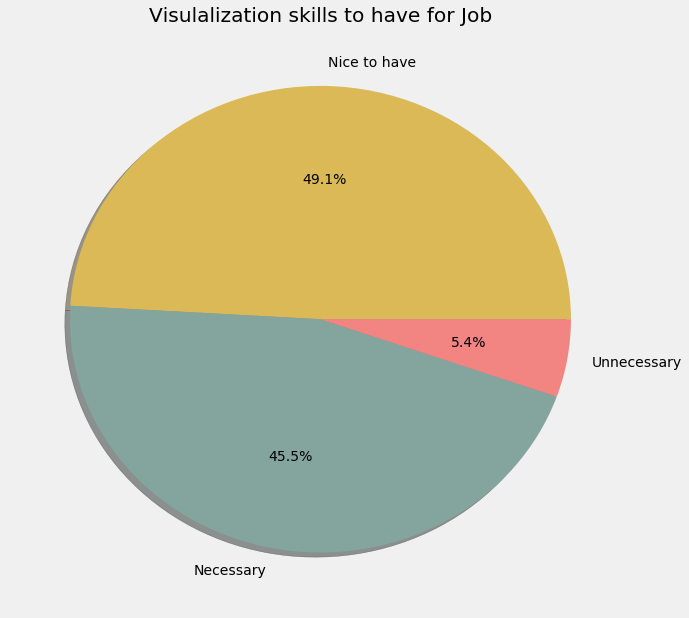

In [161]:
plt.subplots(figsize=(10,10))
jobskillVisual =  mcq_data['JobSkillImportanceVisualizations'].value_counts().to_frame()
colors = ['#DBB957', '#84A59D', '#F28482', '#009FB7']
plt.pie(jobskillVisual['JobSkillImportanceVisualizations'], labels = jobskillVisual.index,shadow=True, colors= colors, autopct='%1.1f%%')
plt.title("Visulalization skills to have for Job")
plt.show()

In [153]:
mcq_data['CoursePlatformSelect'].value_counts()[:10]

Coursera                         636
Coursera,Udacity                 252
Coursera,edX                     155
Coursera,edX,Udacity             131
Other                            125
Udacity                          123
Coursera,DataCamp                120
Coursera,DataCamp,edX,Udacity    109
DataCamp                          97
Coursera,DataCamp,edX             94
Name: CoursePlatformSelect, dtype: int64

## Challenges for data scientist

In [202]:
ch = mcq_data['WorkChallengesSelect'].str.split(',').dropna()
challenge = []
for c in ch:
    for d in c:
        challenge.append(d)
df = pd.DataFrame(challenge)
df.columns = ['challenge']
challenge = df['challenge'].value_counts().to_frame()



,challenge
Dirty data,3641
Lack of data science talent in the organization,3067
Company politics / Lack of management/financial support for a data science team,2746
The lack of a clear question to be answering or a clear direction to go in with the available data,2242
Unavailability of/difficult access to data,2230
Data Science results not used by business decision makers,1796
Explaining data science to others,1622
Privacy issues,1460
Lack of significant domain expert input,1444
Organization is small and cannot afford a data science team,1316
